# Parte 10

Sviluppo dei codici relativi alle formule di quadratura di Newton-Cotes, con $n = 1$ e $n=2$,nella versione composita e automatica.
Sperimentazione numerica relativa alle formule di quadratura implementate.

In [1]:
pkg load symbolic

## Formula dei trapezi composita

Definita su $N$ sottointervalli individuati da nodi equispaziati, a partire da:

$$ 
I(f) := \frac{b - a}{2N} \left( f(a) + 2 \sum_{k = 1}^{N - 1} f(z_{k}) + f(b) \right)
$$

    I = trap_comp(f, a, b, N)
    
Input:
- `f`: funzione integranda (anonymous function);
- `a`, `b`: estremo inferiore e superiore di integrazione;
- `N`: tolleranza.

Output:
- `I`: funzione approssimata risultante dall'integrazione.

In [2]:
function I = trap_comp(f, a, b, N)
% passo di campionamento, effettua un'interpolazione lineare, sfruttando una retta
h = (b - a) / N; 
x = (a:h:b); % nodi equispaziati

y = f(x); % vettore contenente le valutazioni della funzione

I = (y(1) + 2 * sum(y(2:N)) + y(N + 1)) * h / 2;
% formula dei trapezi di quadratura composita
% a = 1
% b = N + 2
% da 2 a N come da 1 a N - 1

end

## Formula di Simpson composita

Definita su $N$ sottointervalli individuati da nodi equispaziati, a partire da:

$$ 
I(f) := \frac{b - a}{6N} \left( f(a) + 2 \sum_{k = 1}^{N - 1} f(z_{k}) + 4 \sum_{k = 0}^{N - 1} f \left(\frac{z_{k} + z_{k + 1}}{2} \right) + f(b) \right)
$$

    I = simp_comp(f, a, b, N)
    
Input:
- `f`: funzione integranda (anonymous function);
- `a`, `b`: estremo inferiore e superiore di integrazione;
- `N`: tolleranza.

Output:
- `I`: funzione approssimata risultante dall'integrazione.

In [3]:
function I = simp_comp(f, a, b, N)

% passo di campionamento (doppio rispetto ai trapezi), dato che effettua
% un'interpolazione quadratica, sfruttando una parabola
h = (b - a) / (2 * N); 
x = (a:h:b); % nodi equispaziati

y = f(x); % vettore contenente le valutazioni della funzione

I = (y(1) + 2 * sum(y(3:2:2*N-1)) + 4 * sum(y(2:2:2*N)) ...
    + y(2 * N + 1)) * h/3; % passo 2 per iterare sui nodi dispari
% formula di Simpson composita
% a = 1
% b = 2*N + 1
% 2 -> N come 3 -> N - 1

end

## Formula del trapezio composita con quadratura automatica

    [I, N] = trap_tol(fun, a, b, tol)
    
Input:
- `f`: funzione integranda (anonymous function);
- `a`, `b`: estremo inferiore e superiore di integrazione;
- `tol`: tolleranza.

Output:
- `I` indica la migliore approssimazione dell'integrale restituita dalla funzione;
- `N` indica il numero di sottointervalli in cui si applica la formula di quadratura del trapezio.

Fino a quando non si raggiunge la tolleranza desiderata o il numero massimo di sottointervalli creati si ricalcola l'approssimazione dell'integrale con un numero di sottointervalli progressivamente crescente.

In [4]:
function [I, N] = trap_tol(fun, a, b, tol)

N_max = 2048; % si impone comunque un limite superiore
err = 1;

N = 1;
I = trap_comp(fun, a, b, N);

while N <= N_max && err > tol
    N = 2 * N; % strategia di raddoppio del numero di sottointervalli
    Ik = trap_comp(fun, a, b, N);
    err = abs(I - Ik) / 3; % formula stima del resto con s = 2
    I = Ik;
end

if N > N_max
    disp("Maximum number of intervals reached!");
    I = [];
    N = [];
    return;
end

end

## Formula di Simpson composita con quadratura automatica

    [I, N] = simp_tol(fun, a, b, tol)

Input:
- `f`: funzione integranda (anonymous function);
- `a`, `b`: estremo inferiore e superiore di integrazione;
- `tol`: tolleranza.

Output:
- `I` indica la migliore approssimazione dell'integrale restituita dalla funzione;
- `N` indica il numero di sottointervalli in cui si applica la formula di quadratura di Simpson.

Fino a quando non si raggiunge la tolleranza desiderata o il numero massimo di sottointervalli creati si ricalcola l'approssimazione dell'integrale con un numero di sottointervalli progressivamente crescente.

In [5]:
function [I, N] = simp_tol(fun, a, b, tol)

N_max = 2048;
err = 1;

N = 1;
I = simp_comp(fun, a, b, N);

while N <= N_max && err > tol
    N = 2 * N; % strategia di raddoppio del numero di sottointervalli
    Ik = simp_comp(fun, a, b, N);
    err = abs(I - Ik) / 15; % formula stima del resto con s = 4
    I = Ik;
end

if N > N_max
    disp("Maximum number of intervals reached!");
    I = [];
    N = [];
    return;
end

end

## TODO - Esercizio 1

In [6]:
syms x
%----------------------
f = 1./(1 + x);
% f = x * sin(pi * x);
% f = x^2 * exp(x);
% f = log(1 + x);
%----------------------
f = function_handle(f);

a = 0;
b = 1;

% calcolo dell'integrale esatto con la built-in function |int(expr,var,a,b)|
% a partire dall'integrale calcolato in forma simbolica si vuole ottenere un double
I_es = double(int(f,x,a,b)); 

tol = 0.5e-3; % il resto deve avere modulo minore di tol

xx = linspace(a, b, 300);

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.


In [7]:
% Stima dell'errore commesso nell'integrazione tramite la formula dei trapezi

% Si calcola il massimo valor assunto dalla funzione in [a,b] tramite
% il calcolo della derivata seconda in formato simbolico
df2_trap = diff(f, x, 2);
df2_trap = function_handle(df2_trap);
yy_trap = feval(df2_trap, xx);
max_trap = max(abs(yy_trap));

Per determinare il numero di iterazioni necessarie per applicare la formula dei trapezi composita si impiega la formula seguente:

$$
N \geq \sqrt[2]{\frac{(b-a)^{3} M}{12 \cdot tol}}
$$

Questa espressione del numero di iterazioni richiesto dalla formula dei trapezi composita si ottiene a partire dalla formula del resto:

$$
|r_{1}^{N}(f)| = \frac{(b - a)^{3}}{12 N^{2}} |f^{2} (x)| \le \frac{(b - a)^{3}}{12 N^{2}} M
$$


$$
\frac{(b - a)^{3}}{12 N^{2}}M \le tol \implies N \geq \sqrt[2]{\frac{(b-a)^{3} M}{12 \cdot t o l}}
$$

Dove $M = \max_{x \in [a,b]} | f^{(2)}(x)|$

In [8]:
% 2. Formula del resto dei trapezi per il numero di iterazioni
N_trap = (((b - a)^3 * max_trap) / (12 * tol))^(1/2);
N_trap = ceil(N_trap);

% 3. Calcolo integrale approssimato con formula dei trapezi composita
I_trap = trap_comp(f, a, b, N_trap);

% 4. Calcolo errore relativo
err_rel = abs(I_es - I_trap) / abs(I_es);

In [9]:
% Stima dell'errore commesso nell'integrazione tramite la formula di Simpson

% Si calcola il massimo valor assunto dalla funzione in [a,b] tramite
% il calcolo della derivata quarta in formato simbolico
df4_simp = diff(f, x, 4);
df4_simp = function_handle(df4_simp);
yy_simp = feval(df4_simp, xx);
max_simp = max(abs(yy_simp));

Per determinare il numero di iterazioni necessarie per applicare la formula dei trapezi composita si impiega la formula seguente:

$$
N \geq \sqrt[4]{\frac{(b-a)^{5} M}{2880 \cdot tol}}
$$

In [10]:
% 2. Formula del resto di Simpson per il numero di iterazioni
N_simp = (((b - a)^5 * max_simp) / (2880 * tol))^(1/4);
N_simp = ceil(N_simp);

% 3. Calcolo integrale approssimato con formula di Simpson composita
I_simp = simp_comp(f, a, b, N_simp);

% 4. Calcolo errore relativo
err_rel_simp = abs(I_es - I_simp) / abs(I_es);

In [18]:
N_simp
N_trap
fprintf("trapezi composita: %e\n", err_rel);
fprintf("simpson composita: %e\n", err_rel_simp);
I_simp
I_trap

N_simp =  3
N_trap =  256
trapezi composita: 2.496877e-04
simpson composita: 8.404948e-01
simpson composita: 1.249434e-01
simpson composita: 9.930228e-03
simpson composita: 6.583810e-04
simpson composita: 4.175720e-05
simpson composita: 2.619405e-06
simpson composita: 1.638628e-07
simpson composita: 1.024377e-08
simpson composita: 6.402719e-10
I_simp =  0.38629
I_trap =  0.38629


## Esercizio 2

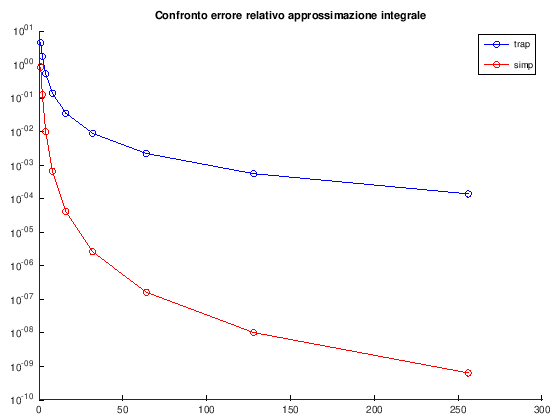

In [12]:
syms x %real

%---------------
f = x^10;
% f = log(x + 1);
% f = arcsin(x);
%---------------
f = function_handle(f);

a = 0; b = 1;
xx = linspace(a, b, 300);
I_es = double(int(f, x, a, b));
abs_es = abs(I_es);

% preallocazione
err_rel_trap = zeros(9, 1);
err_rel_simp = zeros(9, 1);

i = 0;
for N = [1 2 4 8 16 32 64 128 256] 
    i = i + 1;
    I_trap = trap_comp(f, a, b, N);
    I_simp = simp_comp(f, a, b, N);
    err_rel_trap(i) = abs(I_es - I_trap) / abs_es;
    err_rel_simp(i) = abs(I_es - I_simp) / abs_es;
end

figure
semilogy([1 2 4 8 16 32 64 128 256], err_rel_trap, "bo-", ...
    [1 2 4 8 16 32 64 128 256], err_rel_simp, "ro-");
title("Confronto errore relativo approssimazione integrale");
legend("trap","simp")
box off

## Esercizio 3

In [13]:
syms x real

%------------
f = log(x); a = 1; b = 2;
% f = sqrt(x); a = 0; b = 1;
% f = abs(x); a = -1; b = 1;
%------------

f = function_handle(f);
tol = 1.e-6;

[I_trap, N_trap] = trap_tol(f, a, b, tol)
[I_simp, N_toll] = simp_tol(f, a, b, tol)

I_trap =  0.38629
N_trap =  256
I_simp =  0.38629
N_toll =  8


## TODO - Esercizio 4

Si nota che più è piccolo l'esponente più la formula dei trapezi diventa meno efficiente in relazione a quella di Simpson.

In [14]:
syms x
%{
%------------
% f = cos(x); a = 0; b = 2;
% f = x * exp(x) * cos(x^2); a = -2; b = 0;
alpha = 13/2;
% alpha = 5/2;
% alpha = 1/2;
f = (sin(x))^alpha * cos(x); a = 0; b = pi/2;
%------------

f = function_handle(f);

I_es = int(f, x, a, b);
abs_es = abs(I_es);

for k = 4:10
    tol = 1 * 10^-k;   
    [I_trap, N_trap(k - 3)] = trap_tol(f, a, b, tol);
    err_rel_trap(k - 3) = abs(I_es - I_trap) / abs_es;
    [I_simp, N_simp(k - 3)] = simp_tol(f, a, b, tol);
    err_rel_simp(k - 3) = abs(I_es - I_simp) / abs_es;
end

N_val_trap = N_trap + 1;
N_val_simp = N_simp.*2 + 1;
%}

error: __plt2vv__: vector lengths must match
error: called from
    __plt__>__plt2vv__ at line 482 column 5
    __plt__>__plt2__ at line 242 column 14
    __plt__ at line 107 column 18
    semilogy at line 60 column 10
    legend at line 426 column 9


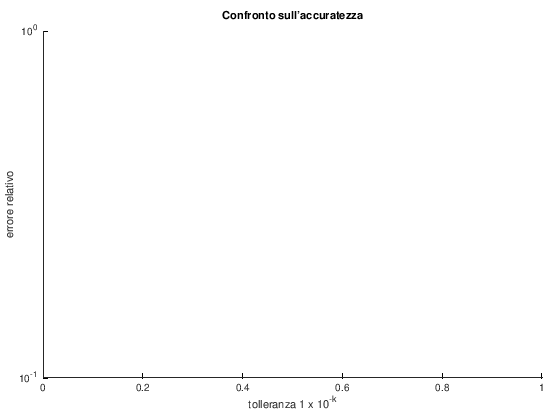

In [15]:
figure
semilogy((4:10), err_rel_trap, "bo-", ...
    (4:10), err_rel_simp, "ro-")
xlabel("tolleranza 1 x 10^{-k}")
ylabel("errore relativo");
legend("trapezi", "simpson");
title("Confronto sull'accuratezza")
box off

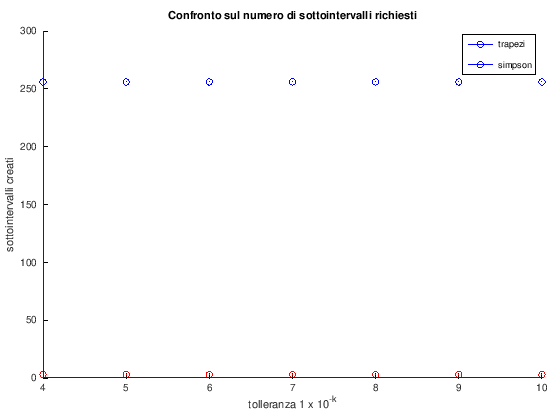

In [16]:
figure
plot((4:10), N_trap, "bo-", (4:10), N_simp, "ro-")
xlabel("tolleranza 1 x 10^{-k}")
ylabel("sottointervalli creati");
legend("trapezi", "simpson");
title("Confronto sul numero di sottointervalli richiesti")
box off

error: 'N_val_trap' undefined near line 1 column 14
    legend at line 426 column 9


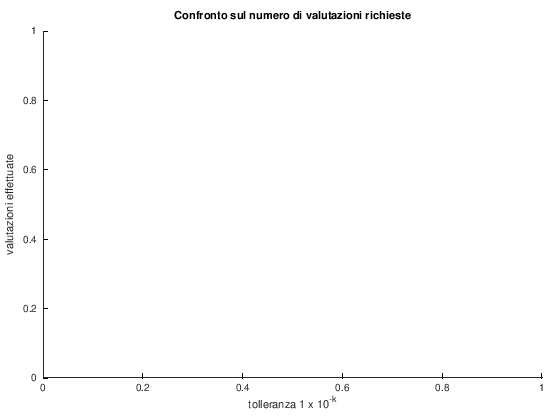

In [17]:
figure
plot((4:10), N_val_trap, "bo-", (4:10), N_val_simp, "ro-")
xlabel("tolleranza 1 x 10^{-k}")
ylabel("valutazioni effettuate");
legend("trapezi", "simpson");
title("Confronto sul numero di valutazioni richieste")
box off